## Alex Ram
## Assignment 2

In [1]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, SimpleRNN
from keras.optimizers import RMSprop
import numpy as np
import random
import sys
import io
import matplotlib.pyplot as plt

/home/tim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Part 1

In [2]:
#Read in the Albert Einstein ... Theory text by character
data = open('data/Albert Einstein___Relativity_ The Special and General Theory.txt', 'r').read()
chars = list(set(data))

#total number of charecters in text being read in
total_chars = len(chars)

#Used to create X and y later on
dict_char = dict()
dict_index = dict()
for i, c in enumerate(chars):
    dict_char[c] = i
    dict_index[i] = c

def create_model_data(sequence_len):
    #initialize vars
    start = 0
    sequence_len = sequence_len
    step = 3
    all_sentences = []
    sequential_chars = []

    #fill the arrays with text to us to make X an y
    for i in range(start, len(data) - (sequence_len + start), step):
        all_sentences.append(data[i: i + sequence_len])
        sequential_chars.append(data[i + sequence_len])

    #initiallize np arrays for X and y
    X = np.zeros((len(all_sentences), sequence_len, total_chars), dtype=np.bool)
    y = np.zeros((len(all_sentences), total_chars), dtype=np.bool)

    #one-hot encode X and y using variables made above to go through text data
    for i, sentence in enumerate(all_sentences):
        for t, char in enumerate(sentence):
            X[i, t, dict_char[char]] = 1
        y[i, dict_char[sequential_chars[i]]] = 1

    return X, y

### Part 2

In [3]:
#call to return a string that is made using the model
def generate_text(model, length):
    generated_text = ''
    
    #find a random place in the text data to start
    start_i = random.randint(0, len(data) - length - 1)
    sentence = data[start_i: start_i + length]
    for i in range(length):
        x_pred = np.zeros((1, length, total_chars))
        for t, char in enumerate(sentence):
            x_pred[0, t, dict_char[char]] = 1.

        #sample a character from a predicted index from the model
        prediction = model.predict(x_pred, verbose=0)[0]
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction)
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        next_i = np.argmax(probas)
        next_char = dict_index[next_i]

        #add the predicted char to the generated text
        generated_text += next_char
        sentence = sentence[1:] + next_char
        
    return generated_text

#will fit the and generate text every 15 epochs for how ever many rounds of 20 specified
def run_model(model, rounds, sequence_len):
    #train
    model_history = model.fit(X, y,
              batch_size=128,
              epochs=1,
              callbacks=[LambdaCallback()])
    #Generate text
    loss_history = model_history.history["loss"]

    print("After 1 Epochs:")
    print(generate_text(model, sequence_len))

    #train more
    for i in range(rounds):
        model_history = model.fit(X, y,
                  batch_size=128,
                  epochs=15,
                  callbacks=[LambdaCallback()])
        #Generate text
        a_loss_history = model_history.history["loss"]
        for loss in a_loss_history:
            loss_history.append(loss)
        print("After 15 more Epochs, at: ", (i+1)*15 )
        print(generate_text(model, sequence_len))
        
    #plot loss vs epoch
    epochs = []
    for i in range(len(loss_history)):
        epochs.append(i)

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Epoch vs Loss")
    plt.plot(epochs,loss_history)
    plt.legend()
    plt.show()

RNN is built
Epoch 1/1
61118/61118 [==============================] - 45s 733us/step - loss: 3.3700
After 1 Epochs:
wrme )µthrwobwpws ssdonannmh obtho tnaerathivem ongs, taoocohy watang'ot ton "auth4is
atebhorosvonme anabfulathuthjlsth. shien"s lon3ghino o  dis thlaeoshuweo bthtigherutyvmerQreSl nbs avoefmohadesotichetylh tofos ton ph ghesxsoebvotawr webtoco-qiweo"oiqhalh o wbu lhh "rools"W-t soafnath-M,atho thud
Epoch 1/15
61118/61118 [==============================] - 44s 721us/step - loss: 2.9038
Epoch 2/15
61118/61118 [==============================] - 44s 719us/step - loss: 2.8227
Epoch 3/15
61118/61118 [==============================] - 44s 719us/step - loss: 2.6080
Epoch 4/15
61118/61118 [==============================] - 44s 717us/step - loss: 2.4856
Epoch 5/15
61118/61118 [==============================] - 45s 730us/step - loss: 2.5871
Epoch 6/15
61118/61118 [==============================] - 45s 733us/step - loss: 2.6432
Epoch 7/15
61118/61118 [==============================]

No handles with labels found to put in legend.


 G,iod codithe pnp
fhe pesd thtinn in eeyfthc sfz ,irme ipfaithemof t t mhled
mmitifit eneTh sis oontanty midiag inf oss fpeimift
aaso deabctiniviinoeeitisa rrimana feonai t inilllinmito. iv
r if poth
wnef ut fhocinnane anothanpitasm an  visiosivemt of spdit in oh of r
leric:dcencvantifm theimfy vel


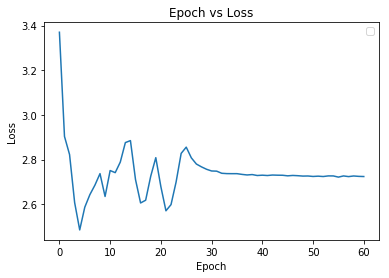

In [8]:
sequence_len = 300
X, y = create_model_data(sequence_len)

#create RNN model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(128, input_shape=(sequence_len, total_chars)))
RNN_model.add(Dense(total_chars))
RNN_model.add(Activation('softmax'))

#compile Model
optimizer = RMSprop(lr=0.01)
RNN_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

#verify it's done
print("RNN is built")

# train and generate text throughout training
rounds_of_15_epochs = 4

#run model
run_model(RNN_model, rounds_of_15_epochs, sequence_len)


### The loss converges to ~2.8 with a min loss of ~2.4. I believe the loss is shooting around like this because the learning rate is too high for the amount of data being fed into the RNN.
### Part 3
### Lets start by trying LSTM and see how it compares to our RNN

LSTM is built
Epoch 1/1
61118/61118 [==============================] - 180s 3ms/step - loss: 2.3193
After 1 Epochs:
ulatite m.e.t, K on o tresencal fiondition
the
or as beence react, and to is in the canvion that the teneromes atimerpes preErester bect the an melatef. In centine and isefiemce of the a pestiace the to the peist of the plened the wher pusdinte. whit
ssementation of
the
rast as shorpyy " lyintt have
Epoch 1/15
61118/61118 [==============================] - 179s 3ms/step - loss: 1.6774
Epoch 2/15
61118/61118 [==============================] - 178s 3ms/step - loss: 1.4501
Epoch 3/15
61118/61118 [==============================] - 180s 3ms/step - loss: 1.3315
Epoch 4/15
61118/61118 [==============================] - 180s 3ms/step - loss: 1.2557
Epoch 5/15
61118/61118 [==============================] - 182s 3ms/step - loss: 1.2005
Epoch 6/15
61118/61118 [==============================] - 180s 3ms/step - loss: 1.1594
Epoch 7/15
61118/61118 [==============================] - 180

No handles with labels found to put in legend.


remoling at rot manner that can be planges our it must wo onl has fleep of ellotic
astarce ou K10ifiny
deslitity we bhostay hypothesis it to the
eggravitational mass well dues of
this chest obtainc. Iforef a mosters the ordints of
the properice a gromacsment of with thesisses with a unitered that in


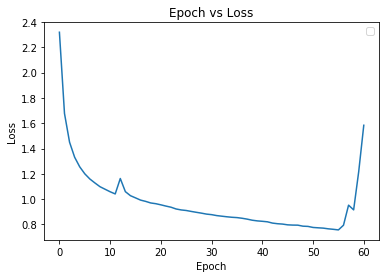

In [9]:
#create LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(128, input_shape=(sequence_len, total_chars)))
LSTM_model.add(Dense(total_chars))
LSTM_model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
LSTM_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

print("LSTM is built")

#run model
run_model(LSTM_model, rounds_of_15_epochs, sequence_len)

### Intuition: LSTM will out preform RNN, you will even see better results in the first epochs
### As you can see: LSTM presents a better loss (min of 0.8 compared to min of 2.4) and more realistic sentences. Again the learning rate was a bit too high, but it seems to be converging to ~0.8 untill at the last 10 epochs it shoots up to 1.5. It doesn't run long enough to converge to anything, but still I imagine it would converge to a lower value than the RNN's 2.8.
### Now lets try to change the number of hidden units in the RNN (cut in half)

RNN is built
Epoch 1/1
61118/61118 [==============================] - 45s 739us/step - loss: 2.4202
After 1 Epochs:
   
 w y prewtin wlak by, w it we
s, wa moum 6set bes aris avirle frve
warv F ih if to a s a hel whive the were wopr with ieq2 Dzs' ,ly aas mas  Th  - we  a e al
l tar  o  h  miel we chout the tat mesurd 2 0 hal  I the mbrt kiti2 -oam blan o la O( hillul A ifor the fby relal s  f em mound ruld tins 
Epoch 1/15
61118/61118 [==============================] - 45s 736us/step - loss: 2.0531
Epoch 2/15
61118/61118 [==============================] - 45s 741us/step - loss: 1.9285
Epoch 3/15
61118/61118 [==============================] - 45s 736us/step - loss: 1.8529
Epoch 4/15
61118/61118 [==============================] - 44s 717us/step - loss: 1.8004
Epoch 5/15
61118/61118 [==============================] - 45s 735us/step - loss: 1.7566
Epoch 6/15
61118/61118 [==============================] - 44s 725us/step - loss: 1.7341
Epoch 7/15
61118/61118 [==============================]

No handles with labels found to put in legend.


aat calen
    an Seale  x mw the, ren taly whg to he what af amasylotly xeravre an  B makeleral
to f
 saon ce so n  innldan st oc   cutt eorg at rawaas as
at bmanhipes wrat meanr ctasgran a     (x cone ande w, trf s, wr al i in ovba in by e if de noan fus
ul fe ri the gt thea  he the
ex
tw r nvintos


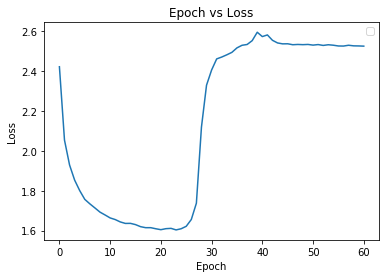

In [6]:
#create RNN model
RNN_model = Sequential()
#change is made on this line bellow (128 to 64)
RNN_model.add(SimpleRNN(64, input_shape=(sequence_len, total_chars)))
RNN_model.add(Dense(total_chars))
RNN_model.add(Activation('softmax'))

#compile Model
optimizer = RMSprop(lr=0.01)
RNN_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

#verify it's done
print("RNN is built")

#run model
run_model(RNN_model, rounds_of_15_epochs, sequence_len)

### Intuition: By halving the number of hiddin units I expect the loss to go down initially, producing better sentences, but this loss will converge to a higher value, meaning later on there will be worse sentences produced. Also since the loss is shooting around in the first RNN, maybe halving the amount of hidden neurons will remove some of the overfitting we are seeing.
### As you can see: This started with lower loss, its min loss was lower, but then due to a poorly choosen learning rate it shot up and convered to a loss of ~2.6. This is still better than the First RNN's loss coverging to 2.8.
### Now lets try to double the sequence length that's fed into the RNN

RNN is built
Epoch 1/1
61018/61018 [==============================] - 88s 1ms/step - loss: 3.3964
After 1 Epochs:

etuaeeeeatea altihcerseaheseiadanaeNtedsaae auaaaeetareeae aieta eDasaaeeia
aeaad eaahaa aieal-etretCatheeaeraaCette eiaeal!dFa1ld7eiaatleeaiesaaeTlat otlas ala aaafaeiabelaafsaaasalesaewelinfhecttaastwt
Paeeuayæai"ist,-aqutav ia mataiaevattaaatasaeatedsaiaaaea t)abaajaahiai tesa
ee3aaaeaaa aettutd ale ealreiaaatia(eaaaa-e
iwehaseaiaCeeoeayteraeZitel(oessathnaltsauexhet2 ieiaa ceiaoeheaits aNeeeWs?aaeaaalcaaaRhahtaaalleaotawiüaiaa^aomatw)teaaetatahtelaetaceafit ciaeecaieae aetea aana iaEeeeeaaetWaeriaeoeaeahsaens  la wzaaetmaaiaocthean,ie"eahe hd tifnasaosaaaaleeasseeaaaahaaadacea a  a olesaq
Epoch 1/15
61018/61018 [==============================] - 88s 1ms/step - loss: 3.1176
Epoch 2/15
61018/61018 [==============================] - 86s 1ms/step - loss: 2.6783
Epoch 3/15
61018/61018 [==============================] - 86s 1ms/step - loss: 2.5527
Epoch 4/15
61018/61018 [===

No handles with labels found to put in legend.


 a  s waldian 
octt rathipy ofiris fhe the
ldaltoufire inyf apso on
re waldisy
tof r thoevetit h  salense n dee gf coincstomionige wcef bpae wit hho itheensos flo

feq Ia
whet tre pasiniwe wud, lpareon f

uts temat eughelendynmeolsy a
 o t =  hjexmmey  of. celswithatnonat te A TurP
aon plen.
entod sulorewigy a npat tu, angponalecofwanysan, thleddecer (bedinns fheonal faa d praratta d asithatba ito pad thevingo wiscl K rel
aly al
to pwhed thpredif them recniond as o- summesrato wuppro nul pr the at  thelmrich enethoreco  ze cfinv ondw
a n  om 

iv in we.idr,r mel of wo,, matho pon
ithe aniaplat


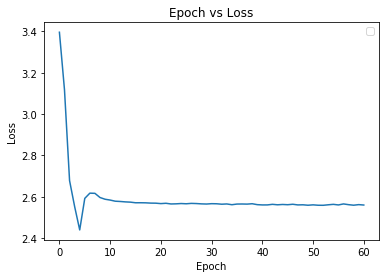

In [7]:
sequence_len = sequence_len*2
X, y = create_model_data(sequence_len)

#create RNN model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(128, input_shape=(sequence_len, total_chars)))
RNN_model.add(Dense(total_chars))
RNN_model.add(Activation('softmax'))

#compile Model
optimizer = RMSprop(lr=0.01)
RNN_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

#verify it's done
print("RNN is built")

#run model
run_model(RNN_model, rounds_of_15_epochs, sequence_len)

### Intuition: I expect that by doubling the sequence length we will see higher loss to start, because there is more to train on, but lower loss towards the end because more data is better.
### As you can see: The learning rate effected this arcitecture less, but it was still high for a sequential length of 600. This is shown by the little shoot up at around epoch 5. It converges quicker to ~2.6 loss, which is better than the original architectures loss of 2.8.
### Since a big problem with my RNN's are that the learning rate is too high, I decreased it from 0.01 to 0.001 and am going to see the loss plot after 30 epochs

RNN is built
Epoch 1/1
61118/61118 [==============================] - 46s 749us/step - loss: 2.7415
After 1 Epochs:
 s i  or ace  f, ct
hes .etlens
ofof whosntinr efourtithests, toselin f poreresoaresgetof scalatomivt xo Me pente thasd bgen thend sl th lsethtss yscr in y orr
eus in fe tinics
andemly th n
ihe acitof
aos
on oD toklumye-ranodd  ou
ind2lia, th  sienno
s ios woanp sfaccadtn ssdthes Gtpdiszarstatit the
Epoch 1/15
61118/61118 [==============================] - 46s 754us/step - loss: 2.3128
Epoch 2/15
61118/61118 [==============================] - 44s 722us/step - loss: 2.1652
Epoch 3/15
61118/61118 [==============================] - 45s 737us/step - loss: 2.0764
Epoch 4/15
61118/61118 [==============================] - 45s 734us/step - loss: 2.0068
Epoch 5/15
61118/61118 [==============================] - 44s 720us/step - loss: 1.9471
Epoch 6/15
61118/61118 [==============================] - 45s 735us/step - loss: 1.8904
Epoch 7/15
61118/61118 [==============================]

No handles with labels found to put in legend.


en it relative statly as at
restst insherth, theimark chaved with the
geder nomont thated as not, our jumbevienes in a be sumpan u-dat noles. The fouble squiven.

in loc. K10Nay fod a Galilei. If thought, this dravinates and t-e, in
ittemulbyed
omotral betatear stamed choth is suppoyent of slucki.g.


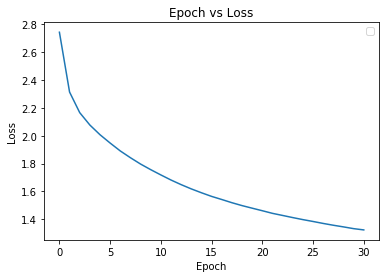

In [10]:
sequence_len = 300
X, y = create_model_data(sequence_len)

#create RNN model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(128, input_shape=(sequence_len, total_chars)))
RNN_model.add(Dense(total_chars))
RNN_model.add(Activation('softmax'))

#compile Model
optimizer = RMSprop(lr=0.001)
RNN_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

#verify it's done
print("RNN is built")

# train and generate text throughout training
rounds_of_15_epochs = 2

#run model
run_model(RNN_model, rounds_of_15_epochs, sequence_len)

### Lowering the learning rate helped a lot. The min ended up around 1.3 and was still going down after 30 epochs. compared to a min of 2.4 with a learning rate of .01, that's a huge improvement. Another option would be to introduce more data to the RNN, because when doubling the sequence length we saw that the loss vs epoch plot coverged closer to the min loss produced. Also After this assignment it became clear, atleast for smaller sequence lengths, that LSTM produces better results, but it takes more time to run.